# Part 1 - Perceptron

# **Perceptron**
Perceptron is a binary classifier, and it is used in supervised learning. A function that can decide whether or not an input which is represented by a vector of number belongs to some specific class is known as binary classifiers. 
It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.
<br><br>
Perceptron consist of four parts and which are required to understand for the implementation of the perceptron model in PyTorch.

* **Input values or one input layer**<br>
The input layer of a perceptron is made of artificial input neurons and brings the initial data into the system for further processing.
* **Weights and bias** <br>
 **Weight** represents the strength or dimension of the connection between units. If the weight from node 1 to node 2 has the greater quantity, then neuron 1 has greater influence over neuron 2. How much influence of the input will have on the output, is determined by weight.<br>
 **Bias** is similar to the intercept added in a linear equation. It is an additional parameter which task is to adjust the output along with the weighted sum of the inputs to the neuron.
* **Activation Function**<br>
A neuron should be activated or not, is determined by an activation function.Thus it bounds the value of the net input.The activation function is a non-linear transformation that we do over the input before sending it to the next layer of neurons or finalizing it as output.<br>
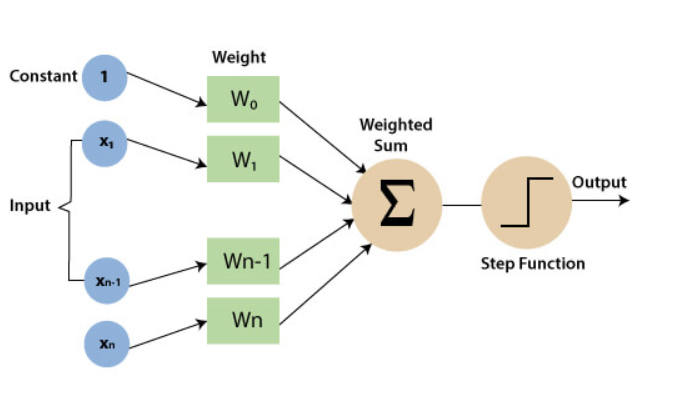

## **Importing Libraries**
We import the PyTorch library for building our neural network and the torchvision library for downloading the MNIST data set. The Matplotlib library is used for displaying images from our data set. In next cell we prepare out dataset.

#### **What is pytorch?**
PyTorch is an open source machine learning library, used for applications such as computer vision and natural language processing.

In [ ]:
import torch
from torchvision import datasets  
import matplotlib.pyplot as plt

#### **What are pytorch tensors?**
A matrix is a grid of numbers, let's say (3x5). In simple terms, a tensor can be seen as a generalization of a matrix to higher dimension. It can be of arbitrary shape, e.g. (3 x 6 x 2 x 10).

For the start, you can think of tensors as multidimensional arrays.
#### **But wait: Why do we even need tensors if we can do exactly the same with numpy arrays?**

torch.tensor behaves like numpy arrays under mathematical operations. However, torch.tensor additionally keeps track of the gradients and provides GPU support.

In [ ]:
M = torch.tensor([1, 2, 3, 4, 5])
M

tensor([1, 2, 3, 4, 5])

## **Preparing dataset**
We index out only the images whose target value is equal to 3 or 7 and normalize them by dividing with 255 and store them separately.<br>
Using the Matplotlib library, we create a function to display the images.

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-03-25 10:53:44--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-25 10:53:44--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.1’

MNIST.tar.gz.1          [         <=>        ]  33.20M  19.3MB/s    in 1.7s    

2021-03-25 10:53:46 (19.3 MB/s) - ‘MNIST.tar.gz.1’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw

In [ ]:
import time 
start=time.time()

mnist = datasets.MNIST(root = './', train=True, download=True)
end=time.time()
end-start

0.029973983764648438

In [ ]:


threes = mnist.data[(mnist.targets == 3)]/255.0
sevens = mnist.data[(mnist.targets == 7)]/255.0

len(threes), len(sevens)

(6131, 6265)

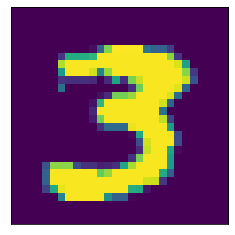

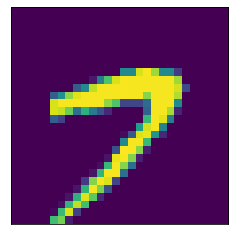

In [ ]:
def show_image(img):
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()
  
show_image(threes[3])
show_image(sevens[8])

In [ ]:
print(threes.shape, sevens.shape)

torch.Size([6131, 28, 28]) torch.Size([6265, 28, 28])


We've created two tensors with images of threes and sevens. Now we need to combine them into a single data set to feed into our neural network.

In [ ]:
combined_data = torch.cat([threes, sevens])
combined_data.shape

torch.Size([12396, 28, 28])

Now we will flatten the images in the data set.

In [ ]:
flat_imgs = combined_data.view((-1, 28*28))
flat_imgs.shape

torch.Size([12396, 784])

We need to create labels corresponding to the images in the combined data set.

In [ ]:
target = torch.tensor([1]*len(threes)+[0]*len(sevens))
target.shape

torch.Size([12396])

## **Training the network**
1. **Building the model**<br>
Below you can see the simplest equation that shows how neural networks work:<br>
<center> y=Wx+b<br></center>
* 'y' refers to our prediction, that is, three or seven. 
* 'W' refers to our weight values.
* 'x' refers to our input image.
* 'b' is the bias (which, along with weights, help in making predictions).<br>

  In short, we multiply each pixel value with the weight values and add them to the bias value.The weights and bias value decide the importance of each pixel value while making predictions.

We are classifying three and seven. So, we can predict 1 if the image is three and 0 if the image is seven. The prediction should be between 0 and 1 so we use **sigmoid** activation function.This allows us to create a threshold of 0.5. That is, if the predicted value is less than 0.5 then it is a seven. Otherwise it is a three. We will create a function for sigmoid. Then we pass in the values from the neural network into the sigmoid.


**Note**: We cannot create a lot of loops to multiply each weight value with each pixel in the image, as it is very expensive. So we can use a magic trick to do the whole multiplication in one go by using matrix multiplication.



In [ ]:
def sigmoid(x): 
  return 1/(1+torch.exp(-x))

def simple_nn(data, weights, bias): 
  return sigmoid((data@weights) + bias)

2. **Defining a loss function**<br>
Now, we need a loss function to calculate by how much our predicted value is different from that of the ground truth.<br>
We will be using mean squared error to check the loss value. Mean squared error finds the mean of the square of the difference between the predicted value and the ground truth.<br>


In [ ]:
def error(pred, target): 
  return ((pred-target)**2).mean()

3. **Initialize weight values**<br>
We just randomly initialize the weights and bias. Later, we will see how these values are updated to get the best predictions.

In [ ]:
w = torch.randn((flat_imgs.shape[1], 1), requires_grad=True)
b = torch.randn((1, 1), requires_grad=True)

### **Gradient Descent**
We use a method called gradient descent to update our weights and bias to make the maximum number of correct predictions.

Our goal is to optimize or decrease our loss, so the best method is to calculate gradients.

We need to take the derivative of each and every weight and bias with respect to the loss function. Then we have to subtract this value from our weights and bias.

In this way, our weights and bias values are updated in such a way that our 
model makes a good prediction.



![image](https://mlfromscratch.com/content/images/2019/12/gradient-descent-optimized--1-.gif)


In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-mobile.mp4" frameborder="0" allowfullscreen></iframe>')

4. **Updatation of weights** <br>
If our prediction does not come close to the ground truth, that means that we've made an incorrect prediction. This means that our weights are not correct. So we need to update our weights until we get good predictions.<br>
For this purpose, we put all of the above steps inside a for loop and allow it to iterate any number of times we wish.<br>
At each iteration, the loss is calculated and the weights and biases are updated to get a better prediction on the next iteration.<br>
Thus our model becomes better after each iteration by finding the optimal weight value suitable for our task in hand.


In [ ]:
pred = simple_nn(flat_imgs, w, b)
print(error(pred, target.unsqueeze(1)))
for i in range(10000):
  
  pred = simple_nn(flat_imgs, w, b)
  loss = error(pred, target.unsqueeze(1))
  #print(loss)
  loss.backward()

  w.data -= 0.001*w.grad.data
  b.data -= 0.001*b.grad.data
 
  w.grad.zero_()
  b.grad.zero_()

  
print("Loss: ", loss.item())

tensor(0.4895, grad_fn=<MeanBackward0>)
Loss:  0.48042726516723633


# Lets see how our perceptron is performing

In [ ]:
simple_nn(sevens[4].view((28*28)),w,b)

tensor([[0.0075]], grad_fn=<MulBackward0>)

In [ ]:
simple_nn(threes[4].view((28*28)),w,b)

tensor([[0.8994]], grad_fn=<MulBackward0>)

# Part 2 - Neural Networks

# **Building a network using multiple perceptron layers(Neural Network)**



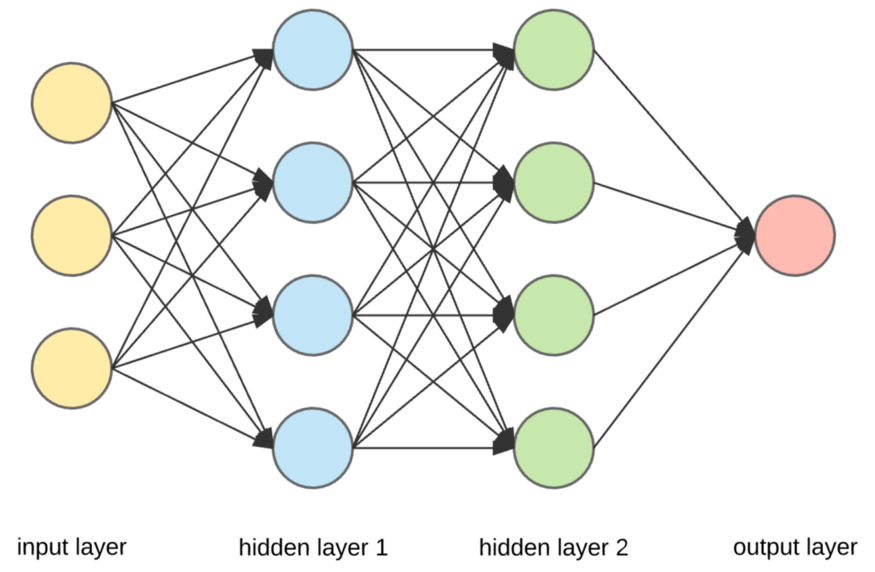
# **CIFAR-10 Dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. We will be training our network using this dataset

In the step below, we are downloading the dataset over the Google Colab Server. It is downloaded as train dataset and test dataset

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [ ]:
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

Files already downloaded and verified


As we have seen above that CIFAR10 consists of 10 classes, let us see what these classes actually are.....

In [ ]:
classes = dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

As we have also seen, there are 5000 train images in CIFAR10 dataset for each class. Let us verify it too.
With this for loop, we can get the number of images per class. It goes through all the dataset, add the class name to a dictionary if it doesn’t exist there yet and counts each image per class.

In [ ]:
class_count = {}
for _, index in dataset:
    label = classes[index]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

{'airplane': 5000,
 'automobile': 5000,
 'bird': 5000,
 'cat': 5000,
 'deer': 5000,
 'dog': 5000,
 'frog': 5000,
 'horse': 5000,
 'ship': 5000,
 'truck': 5000}

In [ ]:
torch.manual_seed(43)
val_size = 5000
train_size = len(dataset) - val_size
print(train_size)

45000


**Validation Dataset** : 
The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
Now, we’ll split the dataset into two groups using random _split method: training and validation datasets.

In [ ]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [ ]:
batch_size=128

Now we are creating dataloaders for training, validation and test sets. We set shuffle=True for the training dataloader, so that the batches generated in each epoch are different, and this randomization helps generalize & speed up the training process. 

On the other hand, since the validation dataloader is used only for evaluating the model, there is no need to shuffle the images.

Also, we set pin_memory=True because we will push the data from the CPU into the GPU and this parameter lets theDataLoader allocate the samples in page-locked memory, which speeds-up the transfer.

num_workers=2 , is an easy switch to perform multi-process data loading by simply setting this argument num_workers to a positive integer.

In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size*2, num_workers=2, pin_memory=True)

Here, we can visualize a batch of data using the make_grid helper function from Torchvision.

images.shape: torch.Size([128, 3, 32, 32])


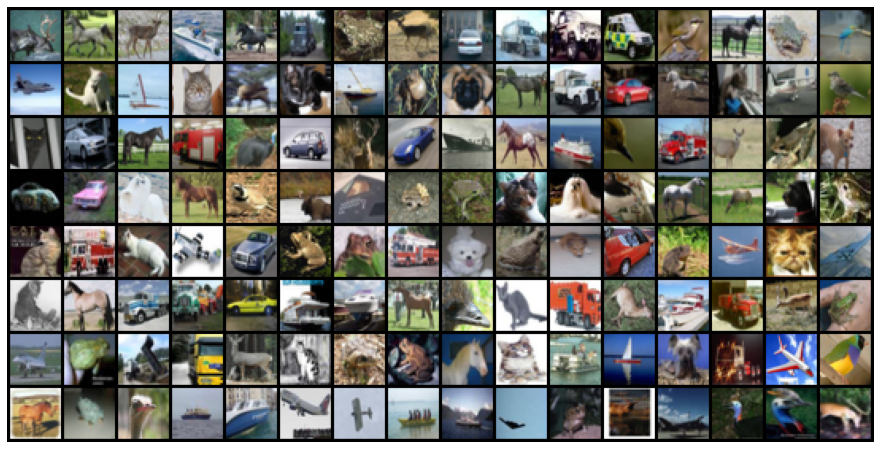

In [ ]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

Given below is a fuction, which will be used to calculate the accuracy of the predictions made by the model. It is used in ImageClassificationBase class below.

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Now here we have some classes and functions in it, which would be used further in our training steps.

First and formost, **'ImageClassificationBase'** class. This class contains some funtion which are common to any imge classification model. These fuction are as follows:

**i) 'training_step**' : This fuction is used in each epoch and for each batch of training data. In this step, we calculate the predictions of our model on the current batch. We also calculate the loss, which is needed to be minimized. This loss is returned from this function for further backpropagation step.

**ii) 'validation_step'** : This fuction provides us the accuracy and loss of our model over the validation dataset for individual batches.

**iii) 'validation_epoch_end'** : This fuction provides us the accuracy and loss of our model over the complete validation dataset.

**iv) 'epoch_end'** : This fuction prints the accuracy and loss over the validation dataset after each epoch.


**Categorical Cross Crossentropy**


![image](https://miro.medium.com/max/1122/1*KY8QcvVOz1sdUnVKKhxWyA@2x.png)

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

Before understanding the following piece of code, lets look at some definations:

a) **Epoch**: The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

b) **Learning rate**: The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.

c)**Gradient Descent** : Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. Through this algorithm, we find the minima of the loss function with respect to the network parameters.

d) **Optimizers** : Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

Now let us understand the following piece of code

**'fit'** : This is the function where the actual training of the the model takes place. Note that the complete data is traversed for training in one epoch.
Each epoch is divided in smaller mini-batches, and that is why this optimization process is also called as mini-batch gradient descent. For each batch, we do the following steps:

i) Generate a baseline prediction of our batch datapoints with our model.

ii) Calculate the loss for those datapoints(by seeing the difference between the actual and the predicted results.)

iii) Performing a gradient descent step to optimize our parameters in order to minimize our loss function.

After these steps are done on each batch in an epoch, we obtain the model performance by getting its loss and accuracy on the validation dataset and then store it.

When one epoch is over, we go for further epochs in the similar fashion


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch) #getting model outputs on our batch
            loss.backward()                   #performing backpropagation
            optimizer.step()                  #taking a step along the gradient and updating the weights
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

**Using a GPU**


In [ ]:
torch.cuda.is_available()

True

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

The function below are used to plot the validation loss and accuracies with respect to number of epoch.

In [ ]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
input_size = 3*32*32
output_size = 10

**Model architechture**

Below is the class which is inherited from ImageClassificationBase class. It comprises of 3 linear layers.
The first layer is of the size of input image(32x32x3). The Second Layer has 256 nodes in it. The third layer has 128 nodes.

The third layer outputs the confidence scores for the 10 classes in our dataset.

**Forward Pass**

The forward function of the class is used to run a forward pass on our data. But here is a differnce between the forward pass in a normal perceptron and here. Here we use activation functions after each layer. Let us look at what are activation functions.

**Activation Function** : An activation function is a very important feature of an artificial neural network , they basically decide whether the neuron should be activated or not. Here we are using ReLU(rectified linear unit) activation fuction which can be defined as:

    relu(x) = max(0,x)

So activation functions add a non-linearity to our model, without this our model would be simply a linear regression model.


In [ ]:
class CIFAR10Model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 256)
        self.linear2 = nn.Linear(256, 128)
        self.linear3 = nn.Linear(128, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        # Apply layers & activation functions
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        return out

In [ ]:
model = to_device(CIFAR10Model(), device) #Initializing the model

In [ ]:
history = [evaluate(model, val_loader)] #  running a forward pass
history

[{'val_acc': 0.10199908167123795, 'val_loss': 2.3088371753692627}]

In [ ]:
history += fit(10, 1e-3, model, train_loader, val_loader) #training the model for 10 epochs

Epoch [0], val_loss: 2.2957, val_acc: 0.1321
Epoch [1], val_loss: 2.2855, val_acc: 0.1707
Epoch [2], val_loss: 2.2754, val_acc: 0.1824
Epoch [3], val_loss: 2.2634, val_acc: 0.1961
Epoch [4], val_loss: 2.2500, val_acc: 0.2006
Epoch [5], val_loss: 2.2343, val_acc: 0.2049
Epoch [6], val_loss: 2.2168, val_acc: 0.2130
Epoch [7], val_loss: 2.1971, val_acc: 0.2167
Epoch [8], val_loss: 2.1762, val_acc: 0.2234
Epoch [9], val_loss: 2.1544, val_acc: 0.2278


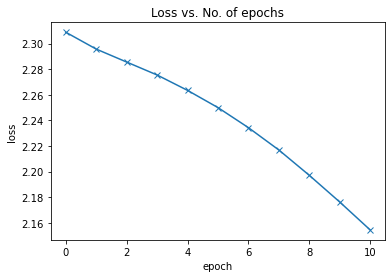

In [ ]:
plot_losses(history)

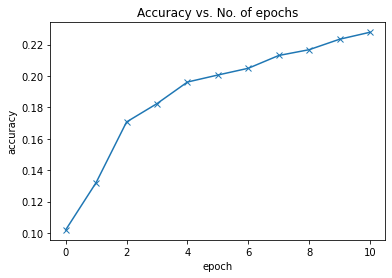

In [ ]:
plot_accuracies(history)

In [ ]:
evaluate(model, test_loader) #evaluating model performance over validate data)

{'val_acc': 0.2265625, 'val_loss': 2.1515538692474365}

# Part 3 - Convolutional Neural Network

In [ ]:
%matplotlib inline


# Training an image classifier

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data


# What are Convolutional Neural Networks?

![CNN](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

Generally, images have features that occur multiple times across it. For example, images have vertical edges spread all over the image. So, instead of treating different areas of the image as independent entities (as we do in a normal neural network), we use shared weights across the whole image in the form of convolutions. A ConvNet is able to successfully capture the Spatial and Temporal dependencies in an image through the application of relevant filters.

*Spatial dependency:* A CNN can determine the relation between the locations of two features of an image. For example, the netowrk will know by the end of training that the nose comes between our two eyes.

*Temporal dependency:* Convolutions can be used to find the relation between two data points seperated by a certain amount of time. For example, CNNs can be used to determine the future position of an object, given, its current and past positions.

## Convolution Layer - The Kernel

![Kernel](https://miro.medium.com/max/500/1*GcI7G-JLAQiEoCON7xFbhg.gif)

The figure above demonstrates the convolution operation. The green section represents an image (here a ` 5 x 5 x 1` image) and the yellow section represents the kernel (or filter) used on our image. The output is the element-wise product of the elements of the kernel and the region of the image masked by the kernel. 

![Complete Convolution](https://miro.medium.com/max/326/1*NsiYxt8tPDQyjyH3C08PVA@2x.png)

The filter moves to the right till it parses the whole width of the image and then hops down and starts over from the left. This process repeats until the whole image is parsed.

### Some important terms

![Stride and Padding](https://miro.medium.com/max/395/1*1VJDP6qDY9-ExTuQVEOlVg.gif)

- **Stride:** The number of pixels the kernel hops over before the next convolution operation.
- **Padding:** The number of pixels appended beside every edge to preserve the shape of the image.

As you can see in the above image, the kernel jumps across two pixels before performing the next convolution. So it has `stride = 2`.

Also, the blue region represents the original image. As you can see, it is `padded` with the white squares. Since there is only one extra pixel outside the original image, the above configuration has `padding = 1`.

- Types of padding:
    - *Same padding:* This type of padding preserves the shape of the image after the kernel has parsed the image. i.e. Dimension after convolution equals the dimension before convolution.
    - *Valid Padding:* Here, `padding = 0`.

## Pooling Layer

![Pooling](https://miro.medium.com/max/396/1*uoWYsCV5vBU8SHFPAPao-w.gif)
![Pooling2](https://miro.medium.com/max/500/1*KQIEqhxzICU7thjaQBfPBQ.png)

Our brain contains two types of neurons: The ones that activate and perform some sort of processing of their own and the ones that perform some processing based on the activations of the neurons based on the outputs of its input neurons. The pooling layer is similar to the later type. Pooling, in CNNs, is performed in order to decrease the computational power required to process the data and is useful for extracting the dominant features of an image. There are two types of pooling:
- **Max-Pooling:** It returns the maximum value from the portion of the image covered by the kernel.
- **Average Pooling:** It returns the average of all the values from the portion of the image covered by the kernel.

---

### Now that we know what CNNs are, let us make one for ourselves

#1. Loading and Normalizing CIFAR10

Using torchvision, it’s extremely easy to load CIFAR10.

In [ ]:
# import the necessary packages

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [ ]:
# Define the transformation
# transforms.Normalize(mean, std) is used to normalize the data with a given mean and standard deviation.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download the training set using torchvision and apply the above transform on the samples
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
# Make a trainloader from the dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# Define the classes found in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Sizes and Dimenisons

In [ ]:
# Sizes and dimensions
print(f"Total number of training samples: {len(trainset)}")
print(f"Total number of test samples: {len(testset)}")
print(f"Number of batches: {len(trainloader)}")

print(f"Dimensions of a single image: {trainset[0][0].shape}")

dataiter = iter(trainloader)
data = next(dataiter) # Data is a tuple: (input, correct_label)
inputs, labels = data

print(f"Dimensions of inputs of a single batch: {inputs.shape}")
print(f"Dimensions of labels of a single batch: {labels.shape}")

Total number of training samples: 50000
Total number of test samples: 10000
Number of batches: 12500
Dimensions of a single image: torch.Size([3, 32, 32])
Dimensions of inputs of a single batch: torch.Size([4, 3, 32, 32])
Dimensions of labels of a single batch: torch.Size([4])


### Know what you are dealing with

Let us visualise some images from the training set.

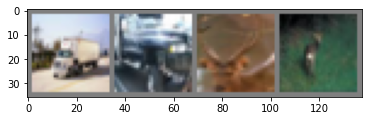

truck truck deer deer


In [ ]:
# A function to undo the transformation applied on the data sample and render it
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Define an iterator to iterate through the batches in 'trainloader' one by one
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show the images
imshow(torchvision.utils.make_grid(images))
# Show the classes corresponding to the images
print(' '.join(f"{classes[labels[j]]}" for j in range(4)))

# 2. Define a Convolutional Neural Network

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Define the layers with parameters
        self.conv1 = nn.Conv2d(3, 6, 5) # (in_channels, out_channels, kernel_size)
        self.pool = nn.MaxPool2d(2, 2) # (kernel_size, stride)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # Flatten
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    # Define forward propagation for the CNN
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# 3. Define a Loss function and optimizer

We use `Cross-Entropy Loss` as out loss function and `Stochastic Gradient Descent (SGD) with momentum` as our optimizer.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4. Train the network

For training a neural network, you loop over the data iterator and feed the inputs to the network and optimize.

In [ ]:
# Training Loop: Number of epochs = 2

for epoch in range(2):

    running_loss = 0.0 # Used for calculating loss accross the training

    # Iterate over the batches in trainloader
    for i, data in enumerate(trainloader, 0):
        # Unpack the data tuple
        inputs, labels = data

        # Flush the gradient buffers
        optimizer.zero_grad()

        # Forward Propagation
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward propagation of the gradient
        loss.backward()

        # Update the gradient
        optimizer.step()

        # Training statistics
        running_loss += loss.item()
        # Print training loss for every 2000th iteration
        if i%2000 == 1999:
            print(f"Epoch: {epoch+1}; Iteration: {i+1}; Loss: {(running_loss/2000):.3f}")
            running_loss = 0.0

print('Yay! Our model is trained!')

Epoch: 1; Iteration: 2000; Loss: 2.151
Epoch: 1; Iteration: 4000; Loss: 1.880
Epoch: 1; Iteration: 6000; Loss: 1.689
Epoch: 1; Iteration: 8000; Loss: 1.593
Epoch: 1; Iteration: 10000; Loss: 1.527
Epoch: 1; Iteration: 12000; Loss: 1.500
Epoch: 2; Iteration: 2000; Loss: 1.413
Epoch: 2; Iteration: 4000; Loss: 1.375
Epoch: 2; Iteration: 6000; Loss: 1.380
Epoch: 2; Iteration: 8000; Loss: 1.321
Epoch: 2; Iteration: 10000; Loss: 1.321
Epoch: 2; Iteration: 12000; Loss: 1.276
Yay! Our model is trained!


### Save your model

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# 5. Test the network on the test data

Let's see what our model does on one batch of our test set. Firstly, let's visualise the data.

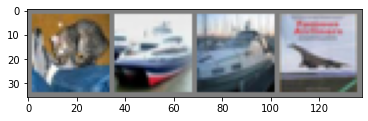

Ground Truth: cat ship ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(f"Ground Truth: {' '.join(f'{classes[labels[j]]}' for j in range(4))}")

Now let's check what our model thinks about these images

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1) # Compute Hard-Max

print(f'Predicted: {" ".join(f"{classes[predicted[j]]}" for j in range(4))}')

Predicted: cat plane car ship


How about the whole dataset?

In [ ]:
correct = 0
total = 0

# We don't need gradients during inference
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the {len(testset)} test set is {100 * correct / total}")

Accuracy of the network on the 10000 test set is 54.22


That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Let's look at the class wise accuracy of our model.

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
for i in range(10):
    print(f"Accuracy of {classes[i]}: {(100 * class_correct[i] / class_total[i]):.2f}%")

Accuracy of plane: 63.10%
Accuracy of car: 70.40%
Accuracy of bird: 16.20%
Accuracy of cat: 22.20%
Accuracy of deer: 54.50%
Accuracy of dog: 67.60%
Accuracy of frog: 50.30%
Accuracy of horse: 67.80%
Accuracy of ship: 62.70%
Accuracy of truck: 67.40%
